# Income Qualification Linear Regression

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
os.chdir("F:\\Vibhuti\\business analytics and intelligence\\simplilearn\\machinelearning\\ML_Projects_Simplilearn\\IncomeQualification")

In [3]:
df = pd.read_csv("train.csv",encoding="ISO-8859-1")

In [4]:
df.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Region,Area
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,1,100,0,1.00,0.0,100.0,1849,4,Central,Urban
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,1,144,0,1.00,64.0,144.0,4489,4,Central,Urban
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,1,0,0,0.25,64.0,121.0,8464,4,Central,Urban


In [5]:
df.shape

(9557, 145)

In [6]:
df['dependency'].replace('yes', '1', inplace= True)
df['dependency'].replace('no', '0', inplace= True)
df['edjefe'].replace('yes', '1', inplace= True)
df['edjefe'].replace('no', '0', inplace= True)
df['edjefa'].replace('yes', '1', inplace= True)
df['edjefa'].replace('no', '0', inplace= True)

In [7]:
df.drop(['idhogar'], axis = 1, inplace = True)

In [8]:
df['edjefe'].unique()

array(['10', '12', '0', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', '1', '3', '18', '13', '20'],
      dtype=object)

In [9]:
df['edjefa'].unique()

array(['0', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', '1', '21', '12', '2', '20', '18'],
      dtype=object)

In [10]:
df['dependency'].unique()

array(['0', '8', '1', '3', '0.5', '0.25', '2', '0.66666669', '0.33333334',
       '1.5', '0.40000001', '0.75', '1.25', '0.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '0.22222222', '5', '0.83333331', '0.80000001',
       '6', '3.5', '1.6666666', '0.2857143', '1.75', '0.71428573',
       '0.16666667', '0.60000002'], dtype=object)

In [11]:
df.iloc[:,1:]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Region,Area
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,1,100,0,1.000000,0.0000,100.0000,1849,4,Central,Urban
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,144,0,1.000000,64.0000,144.0000,4489,4,Central,Urban
2,NaN,0,8,0,1,1,0,NaN,0,0,...,1,0,0,0.250000,64.0000,121.0000,8464,4,Central,Urban
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,16,121,4,1.777778,1.0000,121.0000,289,4,Central,Urban
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,16,121,4,1.777778,1.0000,121.0000,1369,4,Central,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,NaN,0,2,...,25,81,1,1.562500,0.0625,68.0625,2116,2,Huetar Norte,Rural
9553,80000.0,0,6,0,1,1,0,NaN,0,2,...,25,81,1,1.562500,0.0625,68.0625,4,2,Huetar Norte,Rural
9554,80000.0,0,6,0,1,1,0,NaN,0,2,...,25,81,1,1.562500,0.0625,68.0625,2500,2,Huetar Norte,Rural
9555,80000.0,0,6,0,1,1,0,NaN,0,2,...,25,81,1,1.562500,0.0625,68.0625,676,2,Huetar Norte,Rural


In [12]:
pd.set_option('display.max_rows', 500)

In [13]:
df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
pisomoscer            0
pisocemento           0
pisoother             0
pisonatur             0
pisonotiene           0
pisomadera            0
techozinc             0
techoentrepiso        0
techocane             0
techootro             0
cielorazo       

In [14]:
df.isnull().sum().sum()

22140

In [15]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding',
       'SQBdependency', 'SQBmeaned', 'agesq', 'Target', 'Region', 'Area'],
      dtype='object', length=144)

In [16]:
rooms = pd.DataFrame(data = df, columns = ['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q'])

In [17]:
rooms.head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q
0,190000.0,0,3,0,1,1,0
1,135000.0,0,4,0,1,1,1
2,NaN,0,8,0,1,1,0
3,180000.0,0,5,0,1,1,1
4,180000.0,0,5,0,1,1,1


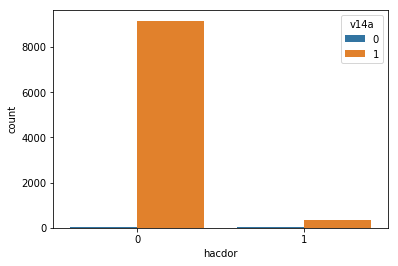

In [18]:
sns.countplot(data = rooms, x = df['hacdor'], hue = df['v14a'] )

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


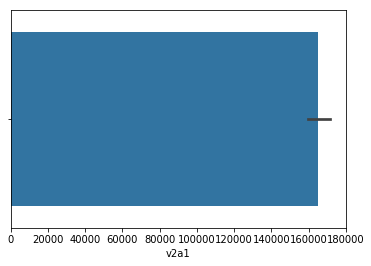

In [19]:
sns.barplot(x = df['v2a1'])

Text(0.5, 1.0, 'Rooms Vs monthly rent paid and have refrigerator')

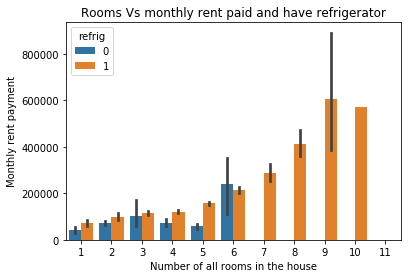

In [20]:
sns.barplot(x=df['rooms'], y=df['v2a1'], hue = df['refrig'])
plt.xlabel("Number of all rooms in the house")
plt.ylabel("Monthly rent payment")
plt.title("Rooms Vs monthly rent paid and have refrigerator")

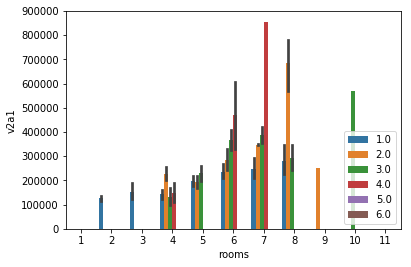

In [21]:
sns.barplot(x=df['rooms'], y=df['v2a1'], hue = df['v18q1'])
plt.legend(loc = 'lower right')

In [22]:
df[df['v2a1']==2353477.0]


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Region,Area
4441,ID_cb5f684a6,2353477.0,0,9,0,1,1,0,NaN,0,...,4,0,0,0.694444,0.0,272.25,2601,4,Central,Urban
4442,ID_15c481789,2353477.0,0,9,0,1,1,0,NaN,0,...,4,0,0,0.694444,0.0,272.25,3249,4,Central,Urban


#the maximum rent paid by the ID who have 9 rooms, they do have refrigerator also they have bathroom, they hold no tablet.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Total indiviuals vs rooms vs Overcrowding by bedrooms')

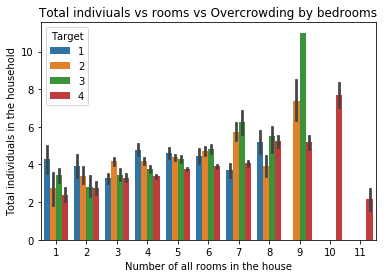

In [23]:
sns.barplot(x= df['rooms'], y= df['hogar_total'], data = df, hue = df['Target'])
plt.xlabel("Number of all rooms in the house")
plt.ylabel("Total individuals in the household")
plt.title("Total indiviuals vs rooms vs Overcrowding by bedrooms")

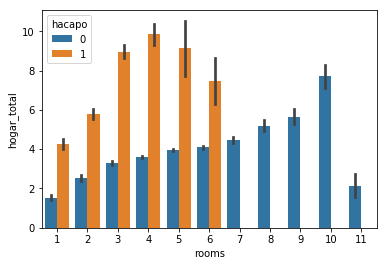

In [24]:
sns.barplot(x= df['rooms'], y= df['hogar_total'], data = df, hue = df['hacapo'])

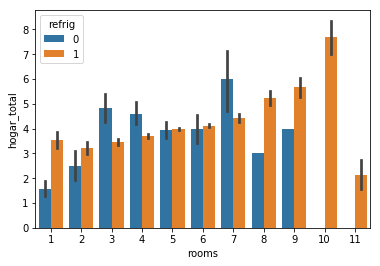

In [25]:
sns.barplot(x= df['rooms'], y= df['hogar_total'], data = df, hue = df['refrig'])

In [26]:
indivivuals = pd.DataFrame(data = df, columns = ['r4h1','r4h2','r4h3','r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize'])

In [27]:
pd.set_option('display.max_rows', 500)

In [28]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding',
       'SQBdependency', 'SQBmeaned', 'agesq', 'Target', 'Region', 'Area'],
      dtype='object', length=144)

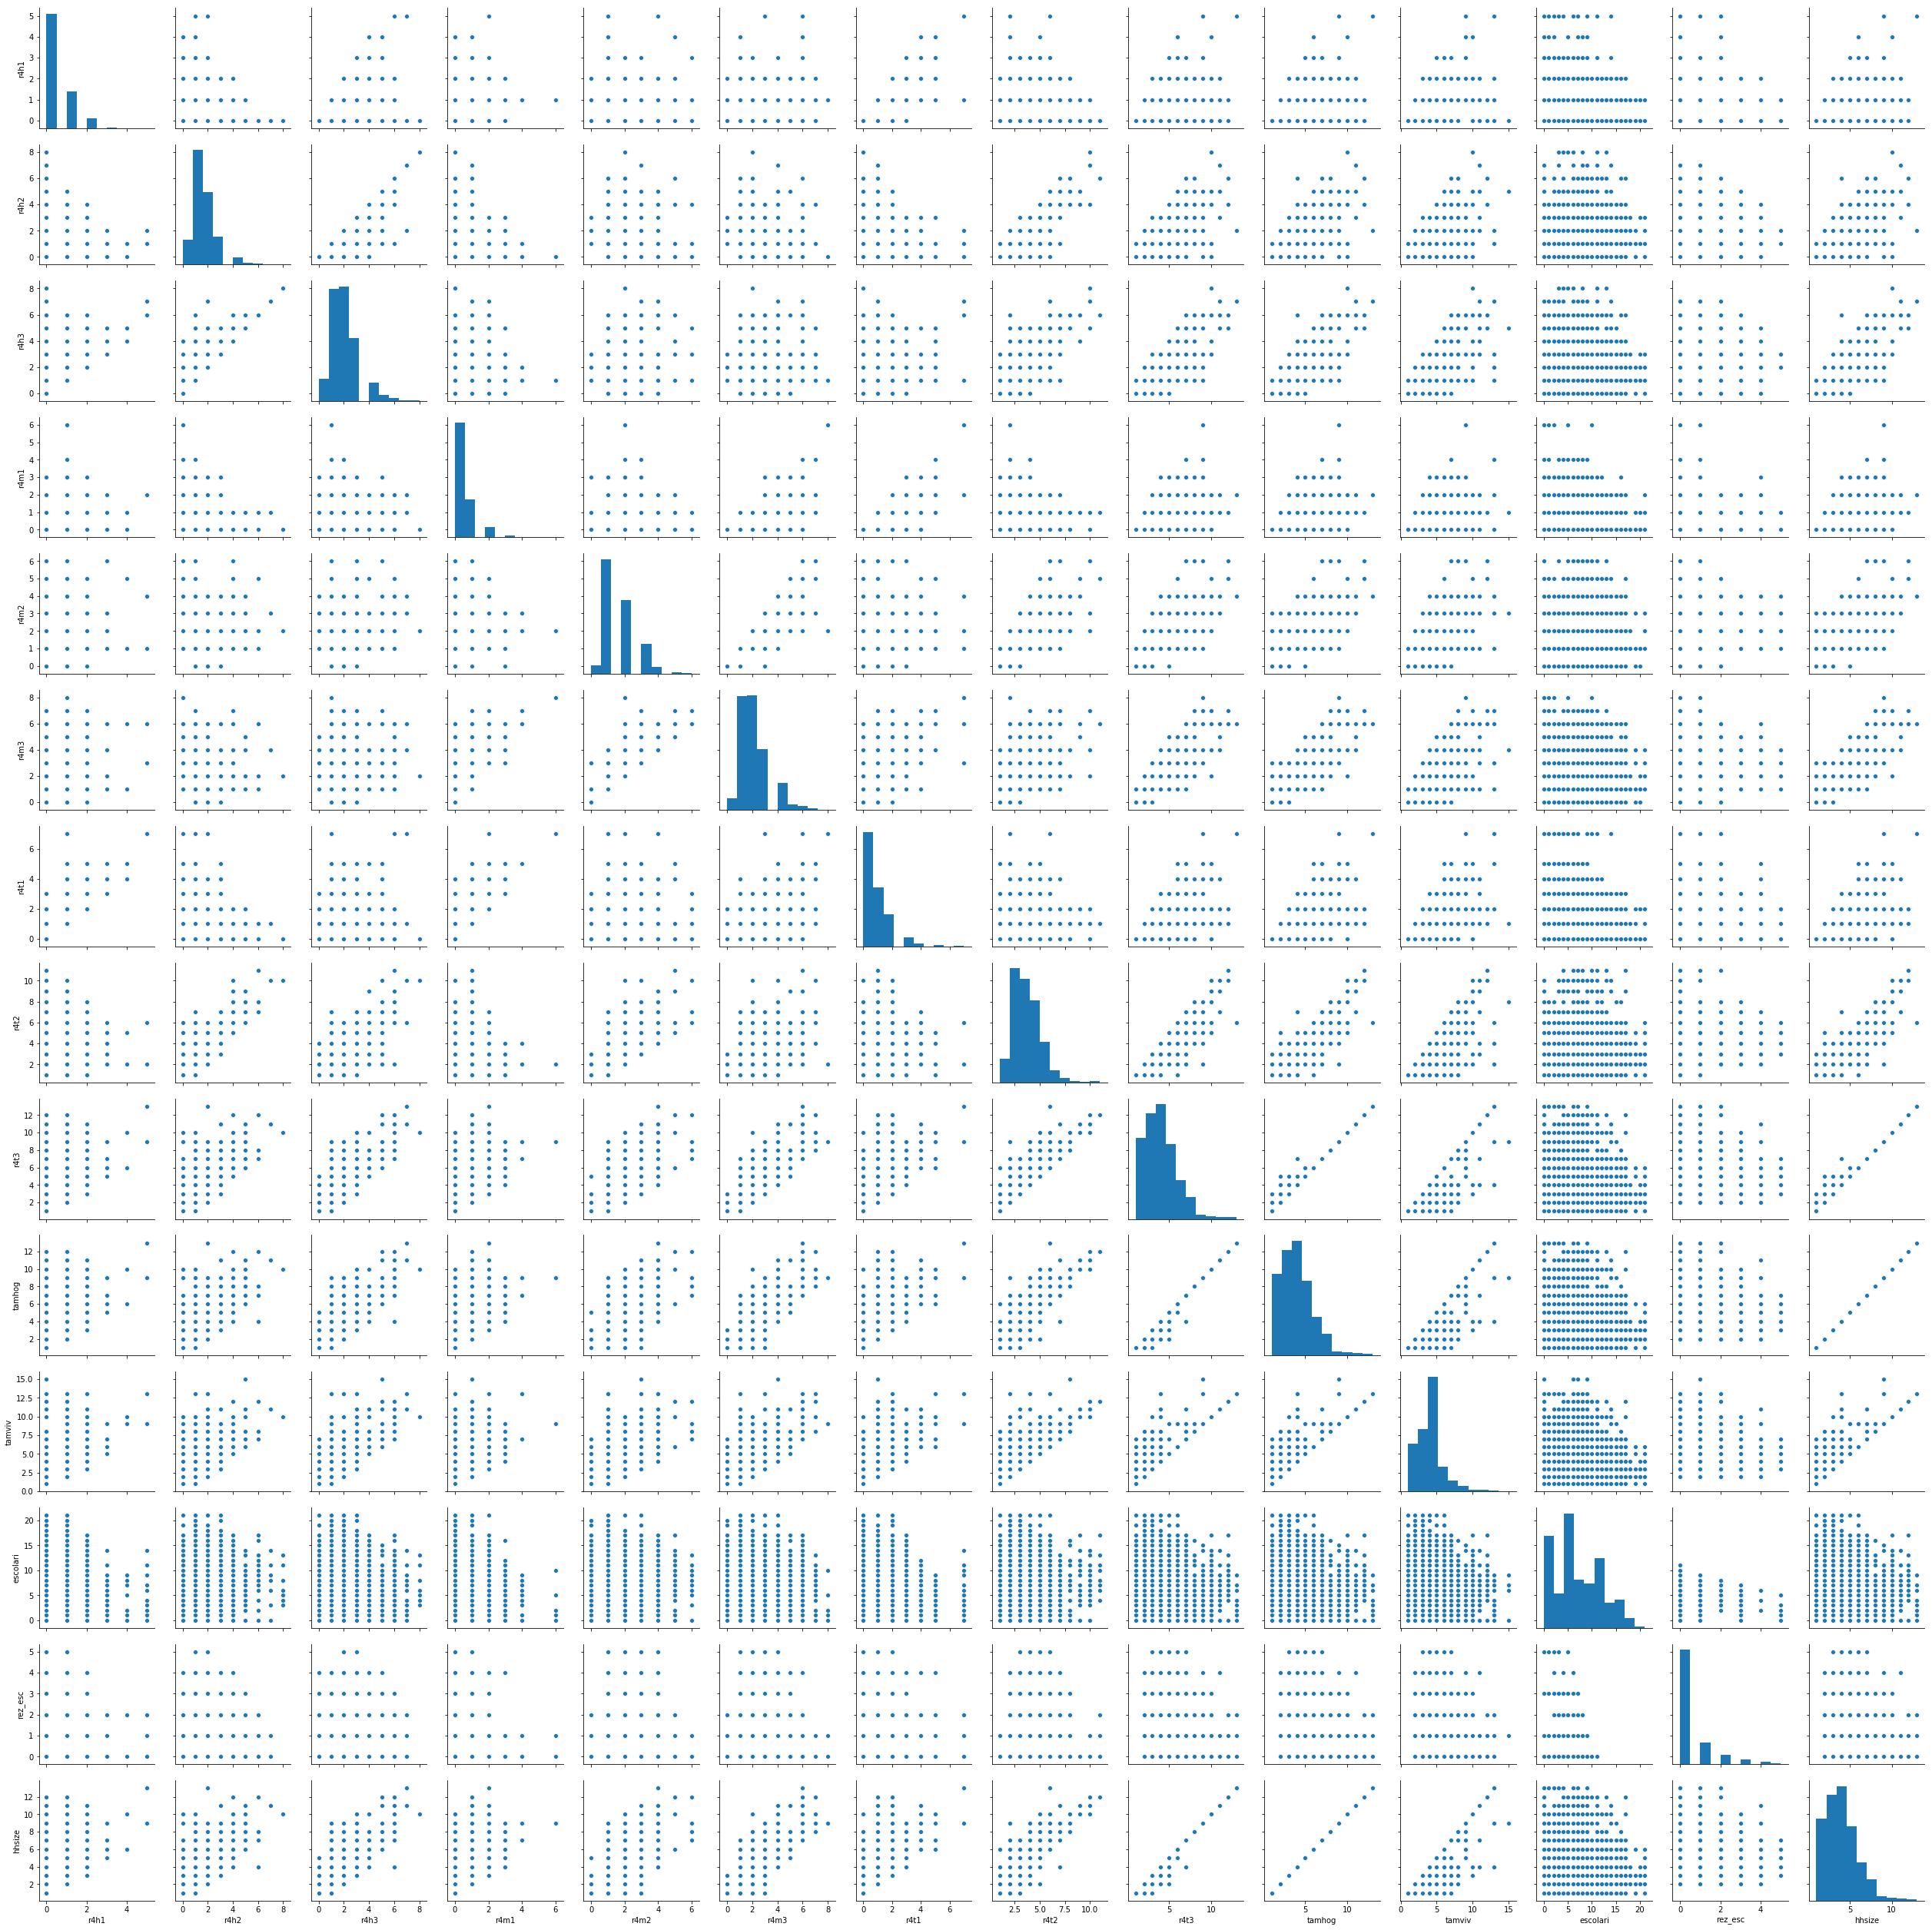

In [29]:
sns.pairplot(indivivuals)

In [30]:
df.shape

(9557, 144)

In [31]:
X= df.iloc[:, 1:141]

In [32]:
y=df.iloc[:, 141]

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [37]:
imp_median = imp_median.fit(df.iloc[:, 1:141])

In [38]:
df.iloc[:, 1:141]=imp_median.transform(df.iloc[:, 1:141])

In [39]:
data =df.iloc[:, 1:141]

In [40]:
data.isnull().sum().sum()

0

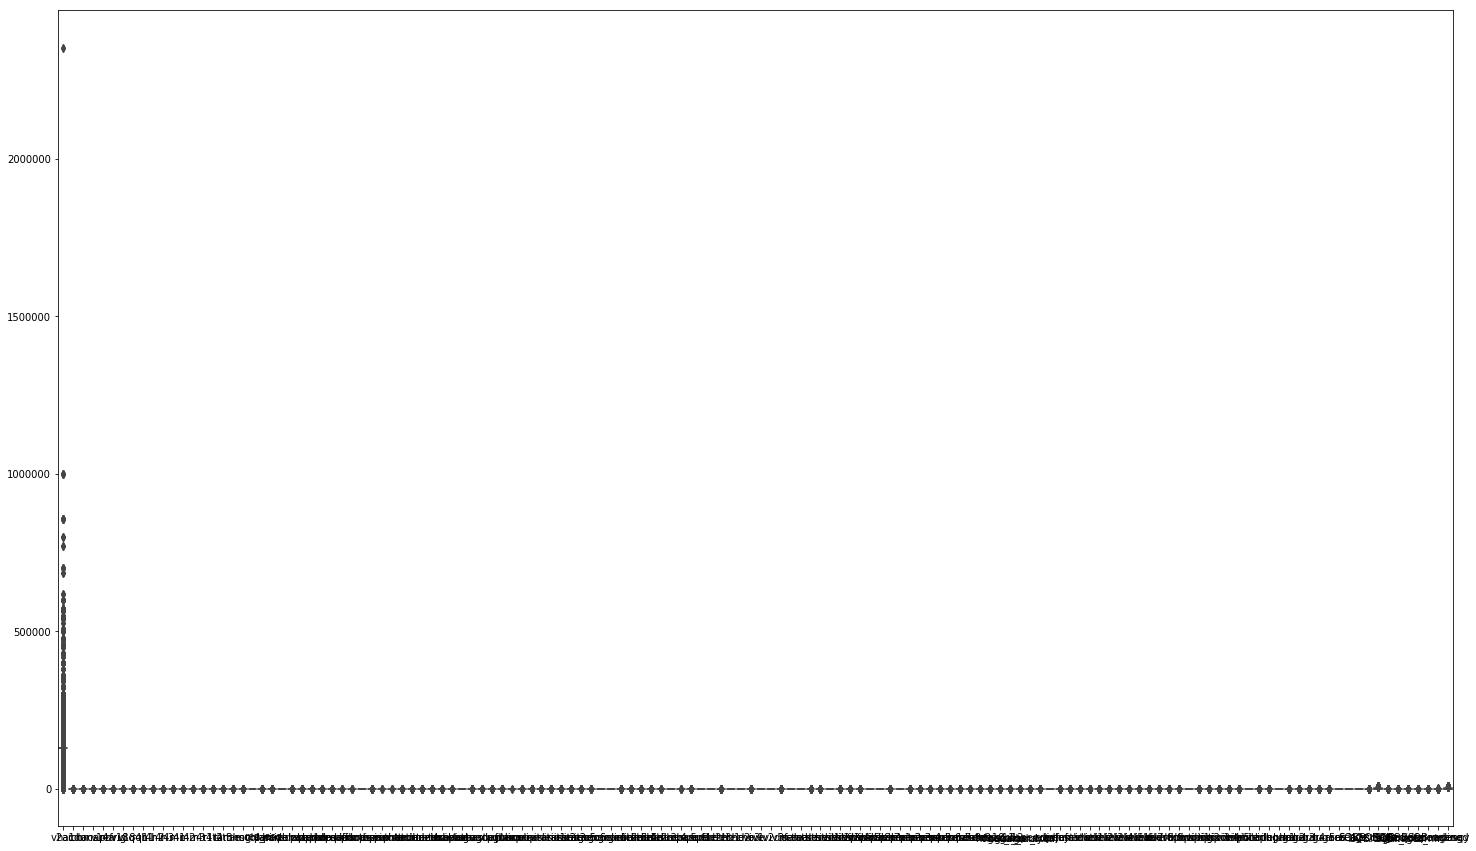

In [41]:
plt.figure(figsize=(25,15))
sns.boxplot(data=data)

In [42]:
y = df.iloc[:, 141]

In [43]:
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [44]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df.shape

(9557, 144)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 144 entries, Id to Area
dtypes: float64(140), int64(1), object(3)
memory usage: 10.5+ MB


In [48]:
X= df.iloc[:, 1:141].values

In [49]:
y = df.iloc[:,141].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 110   13    0   28]
 [   6  283    6   36]
 [   4    5  199   38]
 [   0    3    9 1172]]
              precision    recall  f1-score   support

           1       0.92      0.73      0.81       151
           2       0.93      0.85      0.89       331
           3       0.93      0.81      0.87       246
           4       0.92      0.99      0.95      1184

   micro avg       0.92      0.92      0.92      1912
   macro avg       0.92      0.85      0.88      1912
weighted avg       0.92      0.92      0.92      1912

0.9225941422594143


In [55]:
y_pred.sum()

6466

In [56]:
y_test

array([4, 4, 4, ..., 2, 3, 4], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 110   13    0   28]
 [   6  283    6   36]
 [   4    5  199   38]
 [   0    3    9 1172]]


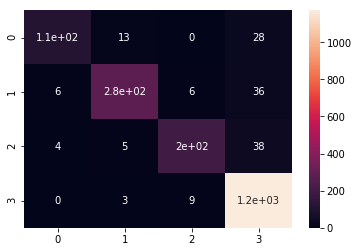

In [59]:
import seaborn
seaborn.heatmap(conf_mat,annot=True)
plt.show()

# Thank You!!